In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

e minimum ==> de/dw = 0, w를 찾으면 됨.

w = w - myu*de/dw : learning rate

e = 1/N * sigma (y_actual - y_pred)^2

e = 0.1 * w^2 + w

de/dw = 0 = 0.2 *w +1 = 0

w = -5 (Analytical solution)

In [2]:
def error(w):
    return 0.1 * w**2 + w


In [3]:
error(4)

5.6

In [4]:
def dedw(w):
    return 0.2*w+1

In [5]:
w=np.arange(-10, 10, 0.1)
error = error(w)
de_dw=dedw(w)

In [6]:
w

array([-1.00000000e+01, -9.90000000e+00, -9.80000000e+00, -9.70000000e+00,
       -9.60000000e+00, -9.50000000e+00, -9.40000000e+00, -9.30000000e+00,
       -9.20000000e+00, -9.10000000e+00, -9.00000000e+00, -8.90000000e+00,
       -8.80000000e+00, -8.70000000e+00, -8.60000000e+00, -8.50000000e+00,
       -8.40000000e+00, -8.30000000e+00, -8.20000000e+00, -8.10000000e+00,
       -8.00000000e+00, -7.90000000e+00, -7.80000000e+00, -7.70000000e+00,
       -7.60000000e+00, -7.50000000e+00, -7.40000000e+00, -7.30000000e+00,
       -7.20000000e+00, -7.10000000e+00, -7.00000000e+00, -6.90000000e+00,
       -6.80000000e+00, -6.70000000e+00, -6.60000000e+00, -6.50000000e+00,
       -6.40000000e+00, -6.30000000e+00, -6.20000000e+00, -6.10000000e+00,
       -6.00000000e+00, -5.90000000e+00, -5.80000000e+00, -5.70000000e+00,
       -5.60000000e+00, -5.50000000e+00, -5.40000000e+00, -5.30000000e+00,
       -5.20000000e+00, -5.10000000e+00, -5.00000000e+00, -4.90000000e+00,
       -4.80000000e+00, -

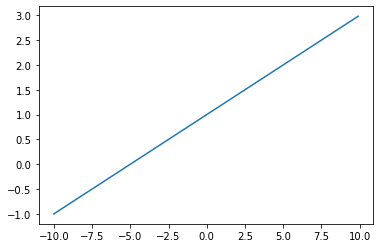

In [7]:
plt.plot(w,de_dw)

In [8]:
error

array([ 0.00000000e+00, -9.90000000e-02, -1.96000000e-01, -2.91000000e-01,
       -3.84000000e-01, -4.75000000e-01, -5.64000000e-01, -6.51000000e-01,
       -7.36000000e-01, -8.19000000e-01, -9.00000000e-01, -9.79000000e-01,
       -1.05600000e+00, -1.13100000e+00, -1.20400000e+00, -1.27500000e+00,
       -1.34400000e+00, -1.41100000e+00, -1.47600000e+00, -1.53900000e+00,
       -1.60000000e+00, -1.65900000e+00, -1.71600000e+00, -1.77100000e+00,
       -1.82400000e+00, -1.87500000e+00, -1.92400000e+00, -1.97100000e+00,
       -2.01600000e+00, -2.05900000e+00, -2.10000000e+00, -2.13900000e+00,
       -2.17600000e+00, -2.21100000e+00, -2.24400000e+00, -2.27500000e+00,
       -2.30400000e+00, -2.33100000e+00, -2.35600000e+00, -2.37900000e+00,
       -2.40000000e+00, -2.41900000e+00, -2.43600000e+00, -2.45100000e+00,
       -2.46400000e+00, -2.47500000e+00, -2.48400000e+00, -2.49100000e+00,
       -2.49600000e+00, -2.49900000e+00, -2.50000000e+00, -2.49900000e+00,
       -2.49600000e+00, -

In [9]:
w = 10
myu = 0.1

In [10]:
w = 10
myu = 0.1
w=w-myu*dedw(w)

In [11]:
w

9.7

In [12]:
w=w-myu*dedw(w)

In [13]:
w

9.405999999999999

In [14]:
w = 10
myu = 0.1
for i in range(1000):
    w_old = w
    w=w-myu*dedw(w)
    if abs( w-w_old) <1.0e-6:
        print("iter:{iteration},w:{weight}".format(iteration = i,weight=w))
        break

iter:625,w:-4.999951736963476


In [15]:
w

-4.999951736963476

## Numerical differentation(Central difference scheme)

In [16]:
def num_dedw(w):
    h = 1.0e-4
    e1 = 0.1*(w-h)**2+(w-h)
    e2 = 0.1*(w+h)**2+(w+h)
    return (e2-e1)/(2*h)

In [17]:
w=10
myu = 0.1
for i in range(1000000):
    w_old = w
    w= w-myu*num_dedw(w)
    if abs(w-w_old) < 1.0e-6:
        print("iter:{iteration},w:{weight}".format(iteration=i,weight = w))
        break

iter:625,w:-4.999951736963734


## Multidimensional Case

f=X0^2 + w*(x1-3)^2 - 10

df/dx0 = 2*x0

df/dx1 = 4*(x1-3)

In [18]:
def problem(x):
    return x[0]**2+2*(x[1]-3)**2-10

In [19]:
def gradient(x):
    grad = np.zeros_like(x) ##차원 미리 세팅
    grad[0]=2*x[0]
    grad[1]=4*(x[1]-3)
    return grad

In [20]:
w= np.array([1,1])
iter_max = 1000000
myu = 0.1

In [21]:
for i in range(iter_max):
    w_old = w
    w= w- myu*gradient(w)
    error = np.sum((w-w_old)**2)
    if error < 1.0e-10:
        print("iter:{iteration},res:{error},w:{weight}".format(iteration=i,error=error,weight = w))
        break

iter:45,res:7.588550360948265e-11,w:[3.48449144e-05 3.00000000e+00]


In [22]:
def numerical_gradient(function,x):
    h=1.0e-4
    grad = np.zeros_like(x)
    x_temp=x.copy()
    for i in range(x.size):
        x_temp[i] = x[i] - h
        f1 = function(x_temp)
        x_temp[i] = x[i] +h
        f2 = function(x_temp)
        grad[i] = (f2-f1)/(2*h)
    return grad

In [23]:
w = np.array([3.0,2.0])
numerical_gradient(problem, w)

array([ 6., -4.])

In [24]:
for i in range(iter_max):
    w_old = w
    w= w- myu*numerical_gradient(problem,w)
    error = np.sum((w-w_old)**2)
    if error < 1.0e-10:
        print("iter:{iteration},res:{error},w:{weight}".format(iteration=i,error=error,weight = w))
        break

iter:50,res:7.33332911084933e-11,w:[3.42539453e-05 3.00000000e+00]


### In-class Practice

1) Define a function with f = (x0-2)^2 + 2(x1-3)^2+3(x2-1)^2-4

2) Write your own code for momentuem(1999) algorithm in the class with alpha=0.3, myu = 0.1 ##learning rate

3) Use the numerical_gradient used in this class

4) Find the w corresponding to minimum value of f.

5) Use initial condition w=[5,5,5],Error_criteria = 1.e-6

6) Report your number of iterations, and numerically obtained w.

In [25]:
def Fun(x):
    return (x[0]-2)**2 + 2*(x[1]-3)**2 + 3*(x[2]-1)**2 - 4


In [26]:
def honwork(function,x):
    h=1.0e-4
    grad = np.zeros_like(x)
    x_temp=x.copy()
    for i in range(x.size):
        x_temp[i] = x[i] - h
        f1 = function(x_temp)
        x_temp[i] = x[i] +h
        f2 = function(x_temp)
        grad[i] = (f1-f2)/(2*h)
    return grad



In [27]:
w=np.array([5,5,5])
iter_max2=1000000
myu=0.1
alpha=0.3
s_old2=0

for i in range(iter_max2):
    w_old2=w
    s2= alpha*s_old2- (1-alpha)*honwork(Fun,w)
    s_old2=s2
    w=w-myu*s2
    error = np.sum((w-w_old2)**2)
    if error < 1.0e-10:
        print("iter:{iteration},res:{error},w:{weight}".format(iteration=i,error=error,weight = w))
        break

iter:71,res:9.710228527188496e-11,w:[1.99996686 3.         1.        ]
